# Восстановление золота из руды

Нужно подготовить прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.



## Подготовка данных

In [2]:
import pandas as pd
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
display(train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [4]:
#добавление целевых признаков в тестовые данные
target = full.loc[:, ['date','final.output.recovery', 'rougher.output.recovery']]
test=test.merge(target, on=['date'],how='left')

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [5]:
#в тренировочных данных оставляю признаки такие же, как в тестовой
columns = test.columns

train=train[columns]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
date                                          14149 non-null object
primary_cleaner.input.sulfate                 14129 non-null float64
primary_cleaner.input.depressant              14117 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14049 non-null float64
primary_cleaner.state.floatbank8_a_air        14145 non-null float64
primary_cleaner.state.floatbank8_a_level      14148 non-null float64
primary_cleaner.state.floatbank8_b_air        14145 non-null float64
primary_cleaner.state.floatbank8_b_level      14148 non-null float64
primary_cleaner.state.floatbank8_c_air        14147 non-null float64
primary_cleaner.state.floatbank8_c_level      14148 non-null float64
primary_cleaner.state.floatbank8_d_air        14146 non-null float64
primary_cleaner.state.floatbank8_d_level      14148 non-null flo

In [6]:
train=train.fillna(method='ffill',axis=0)
test=test.fillna(method='ffill',axis=0)


In [7]:
features_train = train.drop(columns=['date', 'rougher.output.recovery','final.output.recovery'])
target_train = train.loc[:, ['final.output.recovery', 'rougher.output.recovery']]

features_test = test.drop(columns=['date', 'rougher.output.recovery','final.output.recovery'])
target_test = test.loc[:, ['final.output.recovery', 'rougher.output.recovery']]

In [8]:
features_train.shape, features_test.shape

((14149, 52), (5290, 52))

In [9]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_train=model.predict(features_train)

print(mean_absolute_error(target_train, predicted_train))

5.867845646492896


In [10]:
#Константная модель

rougher = pd.Series(target_train['rougher.output.recovery'].median(), index=target_train.index)
final = pd.Series(target_train['final.output.recovery'].median(), index=target_train.index)
predicted=pd.DataFrame({'final.output.recovery': final, 'rougher.output.recovery': rougher}) 

print(mean_absolute_error(target_train, predicted))

7.257942230982364


In [11]:
for depth in range(1, 16, 1):
    model = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    print(depth, mean_absolute_error(target_train, model.predict(features_train)))

1 6.879451381049376
2 6.28507700277423
3 5.819940603247315
4 5.482569119063694
5 5.132856469952202
6 4.873197448470445
7 4.596489278686609
8 4.334008910964405
9 4.112780909327746
10 3.8819790522952173
11 3.6548199718687155
12 3.421129510782178
13 3.205124483715542
14 3.0005452451229546
15 2.7895926038824728


<b> Вывод: </b> 
1. Открыла и изучила данные, в тестовой выборке отсутствуют целевые признаки, в тренировочной выборке намного больше признаков, чем в тестовой. Присутствуют пропуски.
2. Пропуски заполнены функцией для заполнения по предыдущим значениям ffill.
3. Выбросы в данных не убирала, так как это и есть реальная концентрация, важно, чтобы модель умела их видеть и обрабатывать.
4. Вычислила эффективность обогащения металла на обучающей выборке для признака rougher.output.recovery. Нашла MAE равное 5.8, в сравнении с константной моделью, которая предсказывает только медианы, где MAE равно 7.2 - результат лучше, это значт что средняя абсолютная ошибка ниже.
5. При анализе признаков недоступных в тестовой выборке, я заметила что эти параметры относятся к расчестным и выодным характеристикам процесса - calculation и output. То есть их невозможно получить во время технологического процесса - поэтому размер тренировочной выборки был урезан по кол-ву столбцов в тестовой выборке.
6. В тестовую выборку добавлены столбы таргета с помощью поля date из полной выборки.


## Анализ данных

Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [15]:
full.loc[:, ['final.output.concentrate_ag','primary_cleaner.output.concentrate_ag','rougher.output.concentrate_ag']].head()

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
0,6.055403,8.547551,11.500771
1,6.029369,8.558743,11.615865
2,6.055926,8.603505,11.695753
3,6.047977,7.221879,11.915047
4,6.148599,9.089428,12.411054


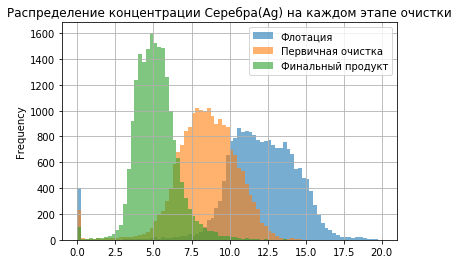

In [51]:
ax_1= full.plot(
    kind='hist',
    y='rougher.output.concentrate_ag',
    histtype='stepfilled',
    bins=80,
    linewidth=4,
    alpha=0.6,
    range = (0,20),
    label='Флотация',
    title='Распределение концентрации Серебра(Ag) на каждом этапе очистки'
)
full.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_ag',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,20),
   label='Первичная очистка',
    ax=ax_1,
    grid=True,
   legend=True,
)
full.plot(
    kind='hist',
    y='final.output.concentrate_ag',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,20),
   label='Финальный продукт',
    ax=ax_1,
    grid=True,
   legend=True,
)


In [16]:
full.loc[:, ['final.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.concentrate_au']].head()

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
0,42.192020,34.174427,19.793808
1,42.701629,34.118526,20.050975
2,42.657501,33.969464,19.737170
3,42.689819,28.260743,19.320810
4,42.774141,33.044932,19.216101


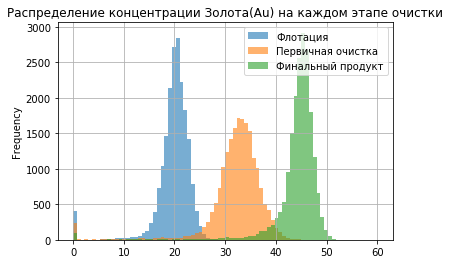

In [54]:
ax_2= full.plot(
    kind='hist',
    y='rougher.output.concentrate_au',
    histtype='stepfilled',
    bins=80,
    linewidth=4,
    alpha=0.6,
    range = (0,60),
    label='Флотация',
    title='Распределение концентрации Золота(Au) на каждом этапе очистки'
)
full.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_au',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,60),
   label='Первичная очистка',
    ax=ax_2,
    grid=True,
   legend=True,
)
full.plot(
    kind='hist',
    y='final.output.concentrate_au',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,60),
   label='Финальный продукт',
    ax=ax_2,
    grid=True,
   legend=True,
)


In [17]:
full.loc[:, ['final.output.concentrate_pb','primary_cleaner.output.concentrate_pb','rougher.output.concentrate_pb']].head()

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
0,9.889648,10.389648,7.101074
1,9.968944,10.497069,7.278807
2,10.213995,10.354494,7.216833
3,9.977019,8.496563,7.175616
4,10.142511,9.986786,7.240205


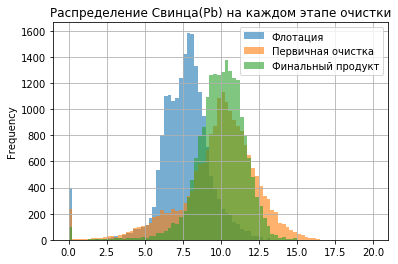

In [60]:
ax_3= full.plot(
    kind='hist',
    y='rougher.output.concentrate_pb',
    histtype='stepfilled',
    bins=80,
    linewidth=4,
    alpha=0.6,
    range = (0,20),
    label='Флотация',
    title='Распределение Свинца(Pb) на каждом этапе очистки'
)
full.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_pb',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,20),
   label='Первичная очистка',
    ax=ax_3,
    grid=True,
   legend=True,
)
full.plot(
    kind='hist',
    y='final.output.concentrate_pb',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,20),
   label='Финальный продукт',
    ax=ax_3,
    grid=True,
   legend=True,
)

In [18]:
full.loc[:, ['final.output.concentrate_sol','primary_cleaner.output.concentrate_sol','rougher.output.concentrate_sol']].head()

,final.output.concentrate_sol,primary_cleaner.output.concentrate_sol,rougher.output.concentrate_sol
0,5.507324,19.529297,28.029297
1,5.257781,19.369147,28.067063
2,5.383759,19.167579,27.454037
3,4.858634,15.978538,27.341277
4,4.939416,19.199864,27.041023


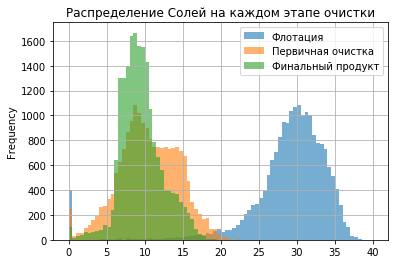

In [63]:
ax_4= full.plot(
    kind='hist',
    y='rougher.output.concentrate_sol',
    histtype='stepfilled',
    bins=80,
    linewidth=4,
    alpha=0.6,
    range = (0,40),
    label='Флотация',
    title='Распределение Солей на каждом этапе очистки'
)
full.plot(
    kind='hist',
    y='primary_cleaner.output.concentrate_sol',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,40),
   label='Первичная очистка',
    ax=ax_4,
    grid=True,
   legend=True,
)
full.plot(
    kind='hist',
    y='final.output.concentrate_sol',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (0,40),
   label='Финальный продукт',
    ax=ax_4,
    grid=True,
   legend=True,
)

1. Серебро - концентрация металла уменьшается с каждым этапом очистки
2. Золото  - концентрация металла увеличивается с каждым этапом очистки
3. Свинец -концентрация металла увеличивается с каждым этапом очистки
4. Соли - концентрация металлов уменьшается с каждым этапом очистки.

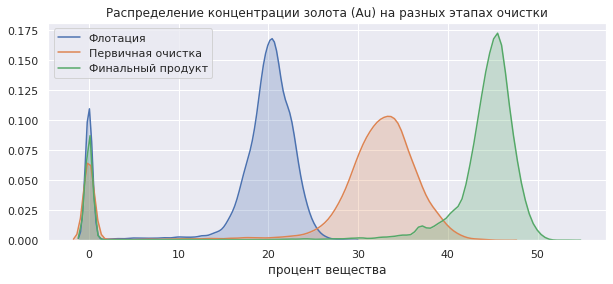

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

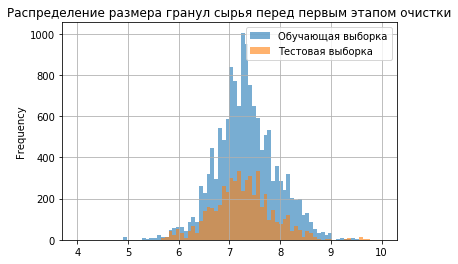

In [19]:
#сравнение распределения размеров гранул

ах= train.plot(
    kind='hist',
    y='primary_cleaner.input.feed_size',
    histtype='stepfilled',
    bins=80,
    linewidth=4,
    alpha=0.6,
    range = (4,10),
    label='Обучающая выборка',
    title='Распределение размера гранул сырья перед первым этапом очистки'
)
test.plot(
    kind='hist',
    y='primary_cleaner.input.feed_size',
    histtype='stepfilled',
    bins=80,
   linewidth=4,
    alpha=0.6,
    range = (4,10),
   label='Тестовая выборка',
    ax=ах,
    grid=True,
   legend=True,
)


Распределение по размерам гранул не сильно отличается на тестовой и тренировочной выборке. Большинство частиц лежат в диапазоне 50-100 мкм

In [20]:
full['final.output.concentrate.summ']=full['final.output.concentrate_ag']+full['final.output.concentrate_au']
+full['final.output.concentrate_pb']+full['final.output.concentrate_sol']


full['primary_cleaner.output.concentrate.summ']=full['primary_cleaner.output.concentrate_ag']+full['primary_cleaner.output.concentrate_au']
+full['primary_cleaner.output.concentrate_pb']+full['primary_cleaner.output.concentrate_sol']

full['rougher.output.concentrate.summ'] = full['rougher.output.concentrate_ag']+full['rougher.output.concentrate_au']
+full['rougher.output.concentrate_pb']+full['rougher.output.concentrate_sol']

full.loc[:, ['final.output.concentrate.summ','primary_cleaner.output.concentrate.summ','rougher.output.concentrate.summ']].head()

,final.output.concentrate.summ,primary_cleaner.output.concentrate.summ,rougher.output.concentrate.summ
0,48.247423,42.721978,31.294579
1,48.730998,42.677269,31.666840
2,48.713427,42.572969,31.432923
3,48.737796,35.482621,31.235857
4,48.922740,42.134360,31.627154


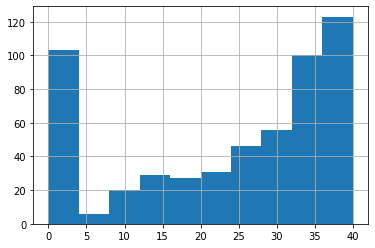

In [21]:
full['final.output.concentrate.summ'].hist(range=(0,40))

In [22]:
full_summ = full.loc[:, ['date','final.output.concentrate.summ']]
train=train.merge(full_summ, on=['date'],how='left')


In [23]:
train=train.loc[train['final.output.concentrate.summ'] != 0]


В суммарной концентрации всех веществ есть нулевые аномалии, что в принципе быть не может, по идее хоть самое минимальное значение, но должно быть в суммарной руде, скорее всего ошибка в данных. Строки с нулевыми значениями в суммарном столбце были удалены из тренировочных данных.

## Модель

1. Напишите функцию для вычисления итоговой sMAPE.


In [24]:
def smape(target,predictions):
    target=target.to_numpy()
    smape_rougher = np.sum(abs(target[:,0]-predictions[:,0]) / 
                           ((abs(target[:,0]) + abs(predictions[:,0]))/2)) * 100 / predictions.shape[0]
                                 
    smape_final = np.sum(abs(target[:,1]-predictions[:,1]) / 
                           ((abs(target[:,1]) + abs(predictions[:,1]))/2)) * 100 / predictions.shape[0]
    
    return 0.25 * smape_rougher + 0.75 * smape_final

score = make_scorer(smape, greater_is_better=False)

2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [ ]:
#Подбор лучших гиперпараметров для Случайного леса

parametrs = { 'n_estimators': range (10, 25, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) },

clf = RandomForestRegressor()
grid = GridSearchCV(clf, parametrs, cv=5,scoring=score)
grid.fit(features_train, target_train)

print(grid.best_params_)

In [ ]:
#Подбор лучших гиперпараметров для Дерева решений

parametrs = { 'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}


clf = DecisionTreeRegressor()
grid = GridSearchCV(clf, parametrs, cv=5,scoring=score)
grid.fit(features_train, target_train)

print(grid.best_params_)
print(grid.best_score_)

In [27]:
model=LinearRegression()
model.fit(features_train,target_train) 
predicted=model.predict(features_train)
scores=cross_val_score(model,features_train,target_train,cv=5,scoring=score)
final_score= np.mean(scores)
print(abs(final_score))



12.663187673937067


In [28]:
model=RandomForestRegressor(max_depth = 7,min_samples_leaf = 7, min_samples_split = 6, n_estimators=20)
model.fit(features_train,target_train) 
predicted=model.predict(features_train)
scores=cross_val_score(model,features_train,target_train,cv=5,scoring=score)
final_score= np.mean(scores)
print(abs(final_score))

10.88088228736597


In [29]:
predicted=model.predict(features_test)
scores=cross_val_score(model,features_test,target_test,cv=5,scoring=score)
final_score= np.mean(scores)
print(abs(final_score))

10.70214227623606


<b> Вывод: </b> 
1. Была написана функция для вычисления  итоговой sMAPE
2. Были подобраны гиперпараметры и обучены три модели - Случайный лес, дерево решений, линейная регрессия.
3. Минимальное значение метрики smape, при оценки качества кросс-валидацией, показала модель случайного леса.
4. На тестовой выборке значение smape модели - 10%.
